# **1. Creating a Google Colaboratory File**

# **2. Importing Required Libraries**

In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import MinMaxScaler, LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split, cross_validate

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.linear_model import Lasso, LinearRegression, Ridge, ElasticNet
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, AdaBoostRegressor

# **3. Project Definition**

For this project, we need to load the Melbourne Housing dataset into our project. The
quality and amount of data we collect will determine how good our predictive model
can be. For this reason, we need to examine the dataset very carefully. We will
estimate the price of a house using the Melbourne Housing dataset, which is a
real-life example. Before evaluating any cost, we will start by analyzing the data
using preprocessing techniques. We will then build our models and measure their
performance to complete the project.

# **4. Gathering and Observing Data**

In [ ]:
df = pd.read_csv("Melbourne_housing_FULL.csv")
df_copy = df.copy()
df_copy.head()

Suburb             Address  Rooms Type      Price Method SellerG  \
0  Abbotsford       68 Studley St      2    h        NaN     SS  Jellis   
1  Abbotsford        85 Turner St      2    h  1480000.0      S  Biggin   
2  Abbotsford     25 Bloomburg St      2    h  1035000.0      S  Biggin   
3  Abbotsford  18/659 Victoria St      3    u        NaN     VB  Rounds   
4  Abbotsford        5 Charles St      3    h  1465000.0     SP  Biggin   

        Date  Distance  Postcode  ...  Bathroom  Car  Landsize  BuildingArea  \
0  3/09/2016       2.5    3067.0  ...       1.0  1.0     126.0           NaN   
1  3/12/2016       2.5    3067.0  ...       1.0  1.0     202.0           NaN   
2  4/02/2016       2.5    3067.0  ...       1.0  0.0     156.0          79.0   
3  4/02/2016       2.5    3067.0  ...       2.0  1.0       0.0           NaN   
4  4/03/2017       2.5    3067.0  ...       2.0  0.0     134.0         150.0   

   YearBuilt         CouncilArea Lattitude  Longtitude             Regionname  \
0        NaN  Yarra City Council  -37.8014    144.9958  Northern Metropolitan   
1        NaN  Yarra City Council  -37.7996    144.9984  Northern Metropolitan   
2     1900.0  Yarra City Council  -37.8079    144.9934  Northern Metropolitan   
3        NaN  Yarra City Council  -37.8114    145.0116  Northern Metropolitan   
4     1900.0  Yarra City Council  -37.8093    144.9944  Northern Metropolitan   

  Propertycount  
0        4019.0  
1        4019.0  
2        4019.0  
3        4019.0  
4        4019.0  

[5 rows x 21 columns]

# **5. Exploratory Data Analysis**

In [ ]:
print(f"Shape     : {df_copy.shape}\n"
      f"Size      : {df_copy.size}\n"
      f"Dimension : {df_copy.ndim}")

Shape     : (34857, 21)
Size      : 731997
Dimension : 2


In [ ]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34857 entries, 0 to 34856
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Suburb         34857 non-null  object 
 1   Address        34857 non-null  object 
 2   Rooms          34857 non-null  int64  
 3   Type           34857 non-null  object 
 4   Price          27247 non-null  float64
 5   Method         34857 non-null  object 
 6   SellerG        34857 non-null  object 
 7   Date           34857 non-null  object 
 8   Distance       34856 non-null  float64
 9   Postcode       34856 non-null  float64
 10  Bedroom2       26640 non-null  float64
 11  Bathroom       26631 non-null  float64
 12  Car            26129 non-null  float64
 13  Landsize       23047 non-null  float64
 14  BuildingArea   13742 non-null  float64
 15  YearBuilt      15551 non-null  float64
 16  CouncilArea    34854 non-null  object 
 17  Lattitude      26881 non-null  float64
 18  Longti

In [ ]:
df_copy.describe().T

count          mean            std          min  \
Rooms          34857.0  3.031012e+00       0.969933      1.00000   
Price          27247.0  1.050173e+06  641467.130105  85000.00000   
Distance       34856.0  1.118493e+01       6.788892      0.00000   
Postcode       34856.0  3.116063e+03     109.023903   3000.00000   
Bedroom2       26640.0  3.084647e+00       0.980690      0.00000   
Bathroom       26631.0  1.624798e+00       0.724212      0.00000   
Car            26129.0  1.728845e+00       1.010771      0.00000   
Landsize       23047.0  5.935990e+02    3398.841946      0.00000   
BuildingArea   13742.0  1.602564e+02     401.267060      0.00000   
YearBuilt      15551.0  1.965290e+03      37.328178   1196.00000   
Lattitude      26881.0 -3.781063e+01       0.090279    -38.19043   
Longtitude     26881.0  1.450019e+02       0.120169    144.42379   
Propertycount  34854.0  7.572888e+03    4428.090313     83.00000   

                        25%          50%           75%           max  
Rooms               2.00000       3.0000  4.000000e+00  1.600000e+01  
Price          635000.00000  870000.0000  1.295000e+06  1.120000e+07  
Distance            6.40000      10.3000  1.400000e+01  4.810000e+01  
Postcode         3051.00000    3103.0000  3.156000e+03  3.978000e+03  
Bedroom2            2.00000       3.0000  4.000000e+00  3.000000e+01  
Bathroom            1.00000       2.0000  2.000000e+00  1.200000e+01  
Car                 1.00000       2.0000  2.000000e+00  2.600000e+01  
Landsize          224.00000     521.0000  6.700000e+02  4.330140e+05  
BuildingArea      102.00000     136.0000  1.880000e+02  4.451500e+04  
YearBuilt        1940.00000    1970.0000  2.000000e+03  2.106000e+03  
Lattitude         -37.86295     -37.8076 -3.775410e+01 -3.739020e+01  
Longtitude        144.93350     145.0078  1.450719e+02  1.455264e+02  
Propertycount    4385.00000    6763.0000  1.041200e+04  2.165000e+04

In [ ]:
df_copy.nunique()

Suburb             351
Address          34009
Rooms               12
Type                 3
Price             2871
Method               9
SellerG            388
Date                78
Distance           215
Postcode           211
Bedroom2            15
Bathroom            11
Car                 15
Landsize          1684
BuildingArea       740
YearBuilt          160
CouncilArea         33
Lattitude        13402
Longtitude       14524
Regionname           8
Propertycount      342
dtype: int64

In [ ]:
cat_cols = ["Suburb", "Address", "Type", "Method", "SellerG", "Date", "CouncilArea", "Regionname"]
num_cols = ["Rooms", "Price", "Distance", "Postcode", "Bedroom2", "Bathroom", "Car", "Landsize", "BuildingArea", "YearBuilt", "Lattitude", "Longtitude", "Propertycount"]

In [ ]:
df_copy.loc[df_copy.duplicated(keep=False), :]

Suburb        Address  Rooms Type  Price Method SellerG  \
15857  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   
15858  Nunawading  1/7 Lilian St      3    t    NaN     SP  Jellis   

             Date  Distance  Postcode  ...  Bathroom  Car  Landsize  \
15857  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   
15858  17/06/2017      15.4    3131.0  ...       3.0  2.0     405.0   

       BuildingArea  YearBuilt              CouncilArea Lattitude  Longtitude  \
15857         226.0     2000.0  Manningham City Council -37.82678   145.16777   
15858         226.0     2000.0  Manningham City Council -37.82678   145.16777   

                 Regionname Propertycount  
15857  Eastern Metropolitan        4973.0  
15858  Eastern Metropolitan        4973.0  

[2 rows x 21 columns]

In [ ]:
df_copy.drop_duplicates(keep='first', inplace=True)
df_copy.loc[df_copy.duplicated(keep=False), :]

Empty DataFrame
Columns: [Suburb, Address, Rooms, Type, Price, Method, SellerG, Date, Distance, Postcode, Bedroom2, Bathroom, Car, Landsize, BuildingArea, YearBuilt, CouncilArea, Lattitude, Longtitude, Regionname, Propertycount]
Index: []

[0 rows x 21 columns]

In [ ]:
df_copy.isnull().sum()

Suburb               0
Address              0
Rooms                0
Type                 0
Price             7609
Method               0
SellerG              0
Date                 0
Distance             1
Postcode             1
Bedroom2          8217
Bathroom          8226
Car               8728
Landsize         11810
BuildingArea     21115
YearBuilt        19306
CouncilArea          3
Lattitude         7976
Longtitude        7976
Regionname           3
Propertycount        3
dtype: int64

In [ ]:
df_copy.fillna(value=np.mean(df_copy), inplace=True)

/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)
/usr/local/lib/python3.10/dist-packages/numpy/core/fromnumeric.py:3430: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


In [ ]:
df_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      3
Lattitude        0
Longtitude       0
Regionname       3
Propertycount    0
dtype: int64

In [ ]:
df_copy.dropna(inplace=True)

In [ ]:
df_copy.isnull().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

**● Data Visualization:**

Text(0.5, 1.0, 'Bulding Area After Treat')

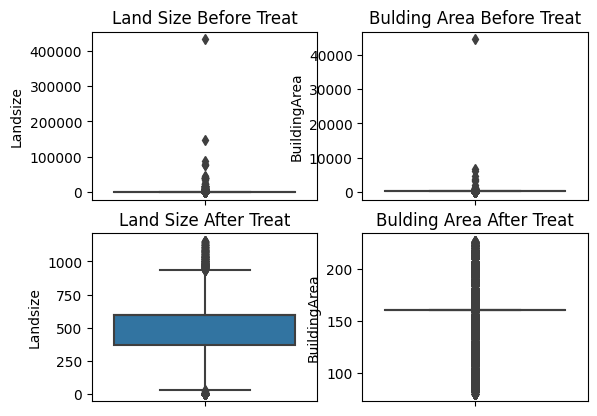

In [ ]:
plt.subplot(2, 2, 1)
sns.boxplot(y="Landsize", data=df_copy)
plt.title("Land Size Before Treat")

plt.subplot(2, 2, 2)
sns.boxplot(y="BuildingArea", data=df_copy)
plt.title("Bulding Area Before Treat")

# Remove Outliers Using Z Score
for i in range(5):
  for j in df_copy[num_cols]:
    mean = np.nanmean(df_copy[j].values.tolist())
    std = np.nanstd(df_copy[j].values.tolist())
    df_copy.drop(df_copy[((df_copy[j] - mean)/std < -3) | ((df_copy[j] - mean)/std > 3)].index, inplace=True)

plt.subplot(2, 2, 3)
sns.boxplot(y="Landsize", data=df_copy)
plt.title("Land Size After Treat")

plt.subplot(2, 2, 4)
sns.boxplot(y="BuildingArea", data=df_copy)
plt.title("Bulding Area After Treat")

Text(0.5, 1.0, 'House Prices')

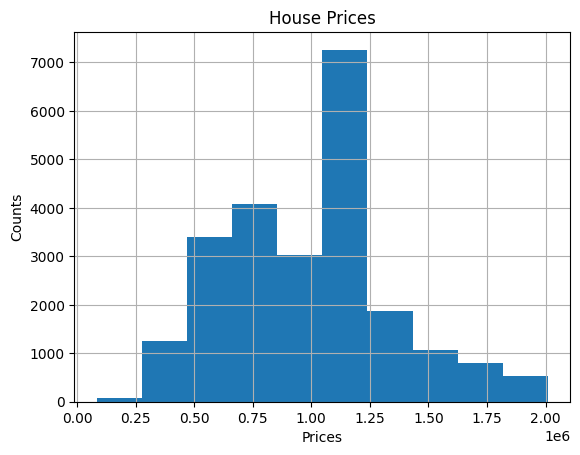

In [ ]:
df_copy["Price"].hist(label="Price")
plt.xlabel("Prices")
plt.ylabel("Counts")
plt.title("House Prices")

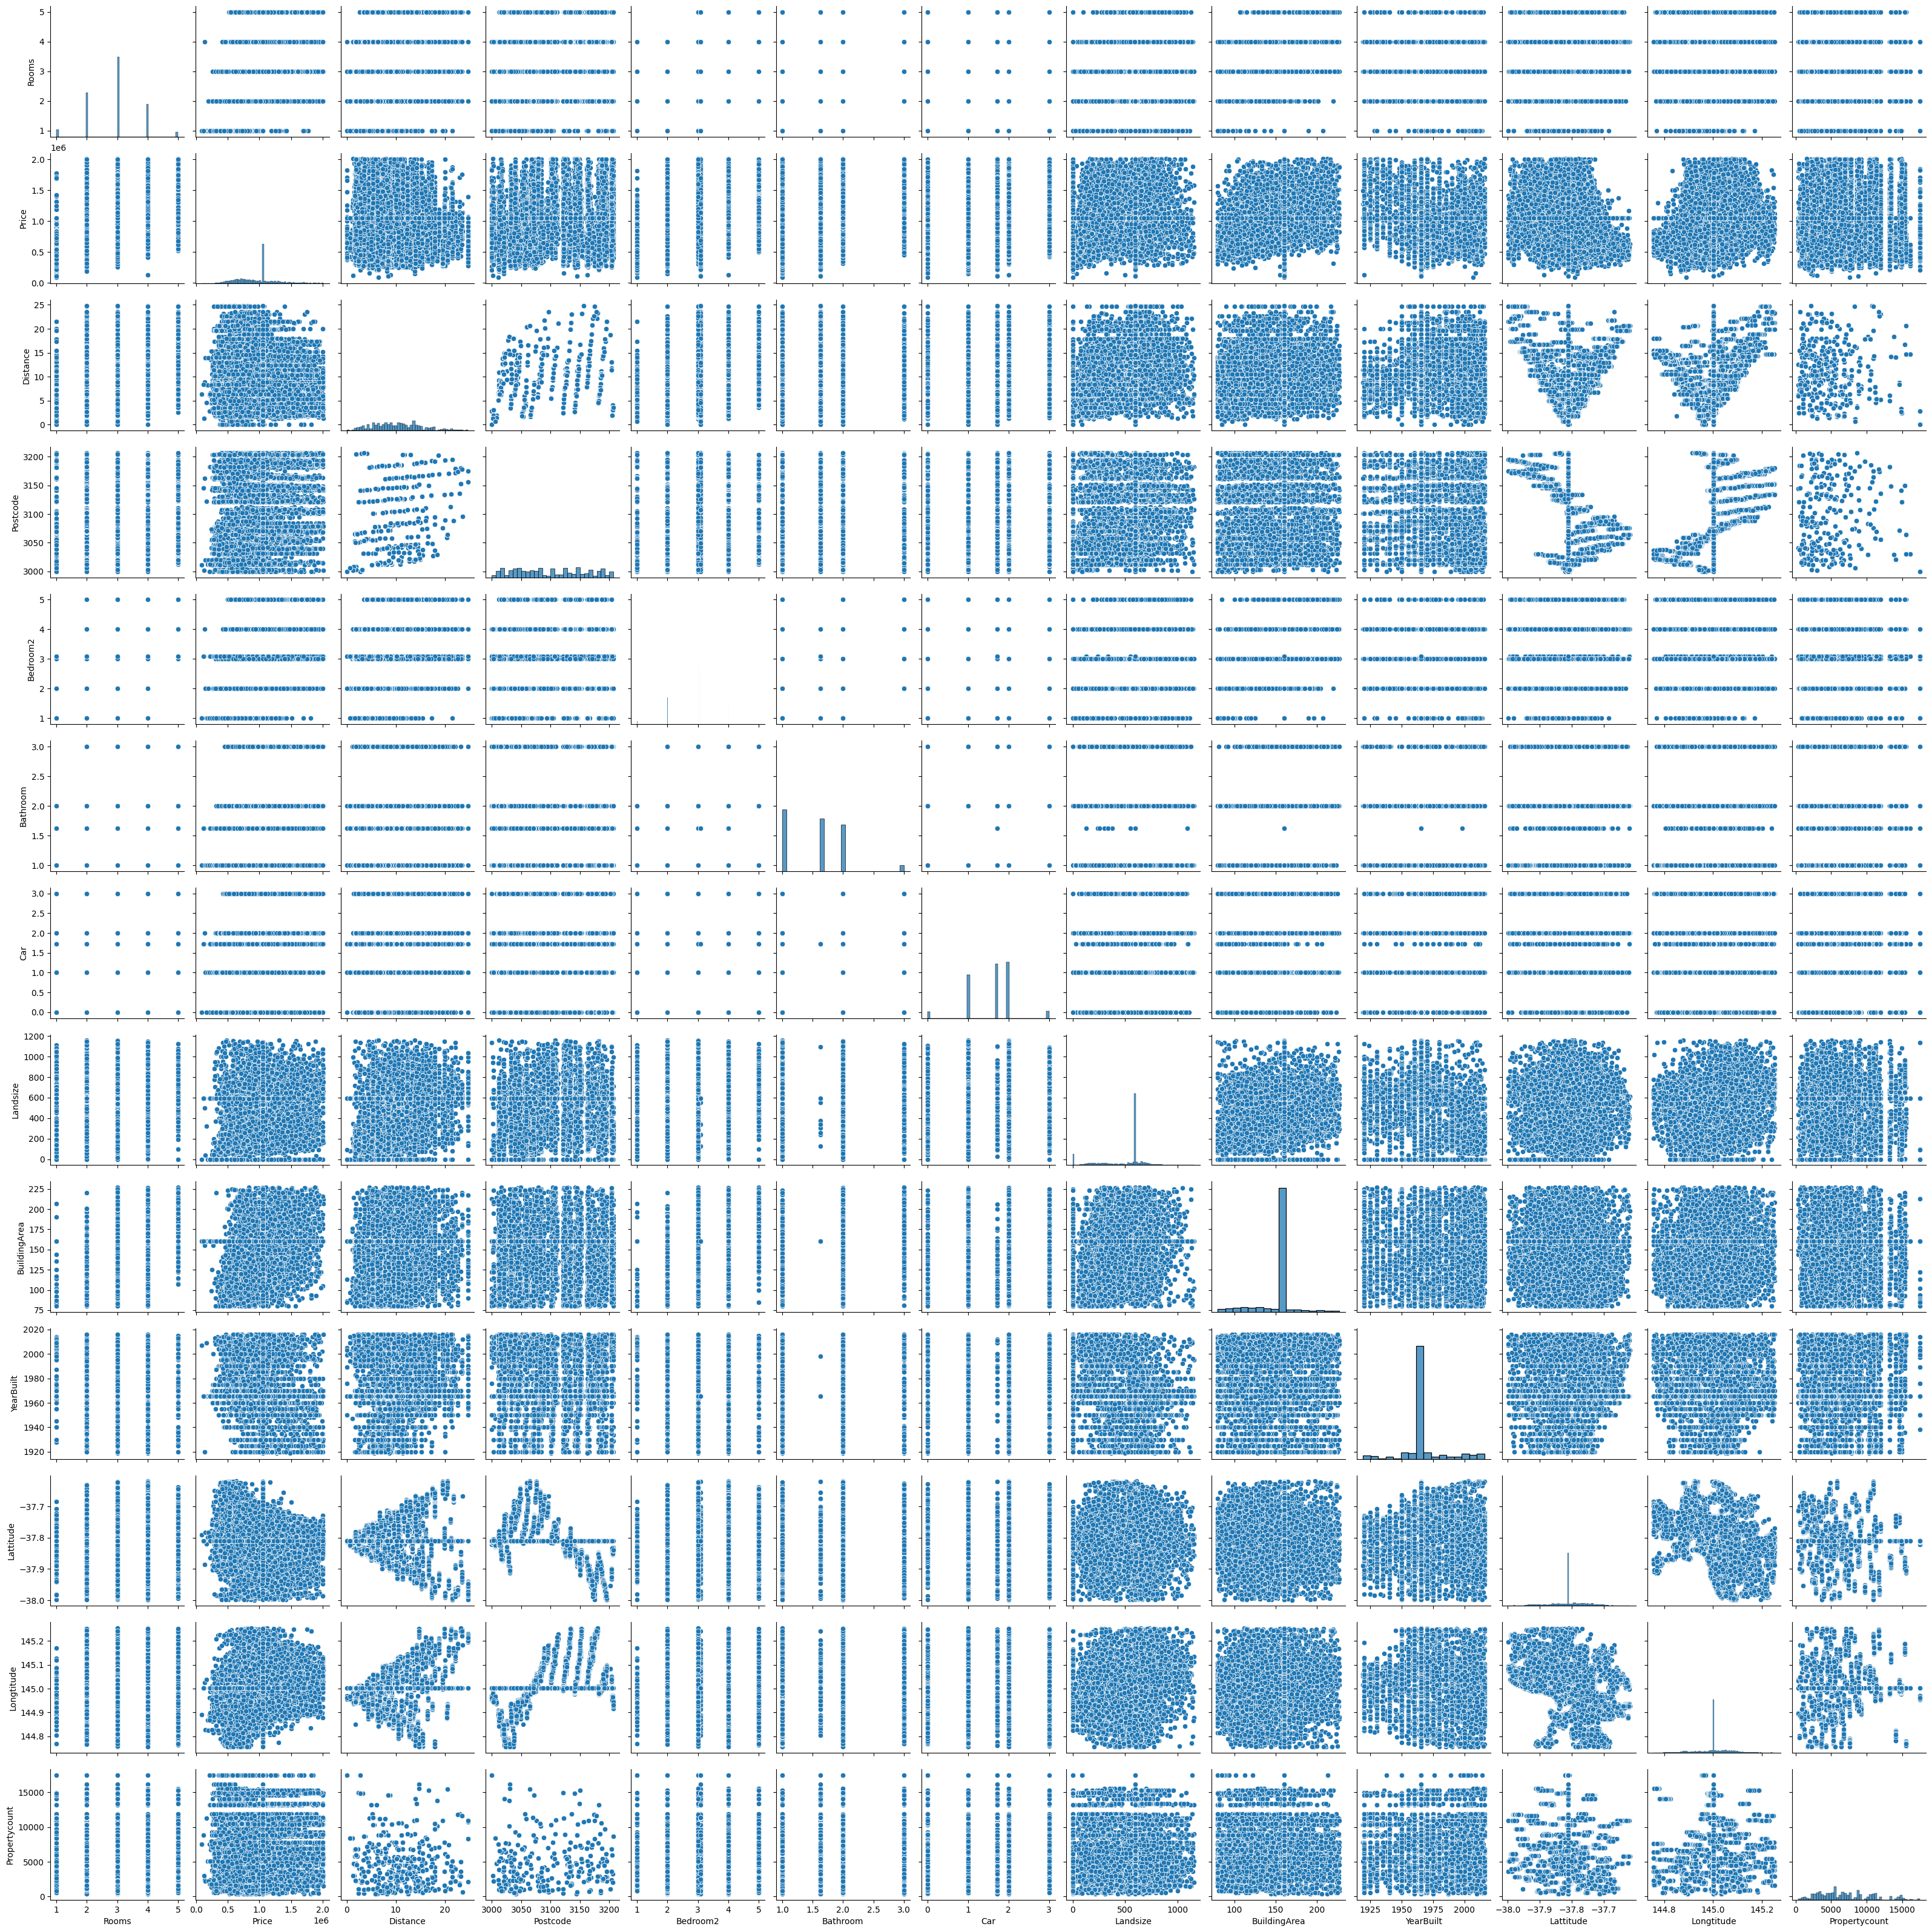

In [ ]:
sns.pairplot(df_copy)

<ipython-input-18-8ed8581405c7>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df_copy.corr(), cmap="Blues", annot=True)


<Axes: >

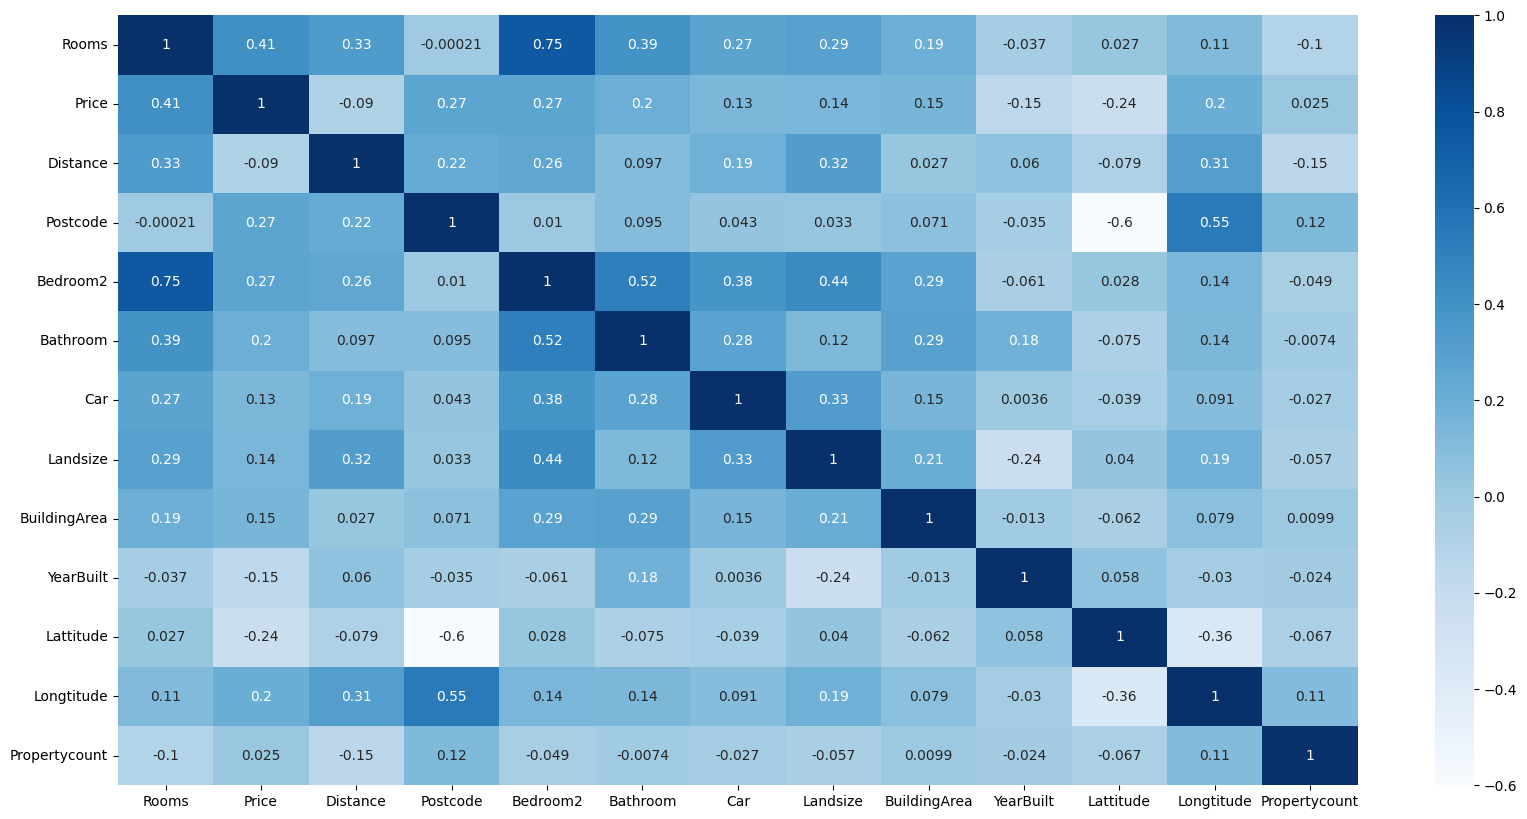

In [ ]:
plt.figure(figsize=(20, 10))
sns.heatmap(df_copy.corr(), cmap="Blues", annot=True)

# **6. Model Selection**

In [ ]:
### Features and labels
# Create the X variable for features
X = df_copy.drop(["Price"], axis=1)

# Create the y variable for output labels
y = df_copy.loc[:, "Price"]

for i in X[cat_cols]:
  d = dict([(y,x+1) for x,y in enumerate(set(X[i]))])
  X[i] = X[i].map(d)

In [ ]:
# Create MinMaxScaler object
scaler = MinMaxScaler()

# Normalize data
data_scaled = scaler.fit_transform(X.join(other=y))

X = data_scaled[:, :-1]
y = data_scaled[:, -1]

In [ ]:
# Create LabelEncoder and OneHotEncoder object
encoder = LabelEncoder()
ohe = OneHotEncoder()

# Encode the features to integers inside a for loop
X = ohe.fit_transform(X)
y = encoder.fit_transform(y)

# Print X
print(X)

# Print y
print(y)

  (0, 247)	1.0
  (0, 17864)	1.0
  (0, 23144)	1.0
  (0, 23150)	1.0
  (0, 23153)	1.0
  (0, 23240)	1.0
  (0, 23501)	1.0
  (0, 23568)	1.0
  (0, 23769)	1.0
  (0, 23869)	1.0
  (0, 23874)	1.0
  (0, 23879)	1.0
  (0, 23978)	1.0
  (0, 25084)	1.0
  (0, 25212)	1.0
  (0, 25275)	1.0
  (0, 29906)	1.0
  (0, 38484)	1.0
  (0, 43962)	1.0
  (0, 44090)	1.0
  (1, 247)	1.0
  (1, 18374)	1.0
  (1, 23144)	1.0
  (1, 23150)	1.0
  (1, 23156)	1.0
  :	:
  (23324, 25278)	1.0
  (23324, 29612)	1.0
  (23324, 38687)	1.0
  (23324, 43960)	1.0
  (23324, 44155)	1.0
  (23325, 194)	1.0
  (23325, 14685)	1.0
  (23325, 23144)	1.0
  (23325, 23150)	1.0
  (23325, 23151)	1.0
  (23325, 23388)	1.0
  (23325, 23505)	1.0
  (23325, 23600)	1.0
  (23325, 23724)	1.0
  (23325, 23869)	1.0
  (23325, 23874)	1.0
  (23325, 23878)	1.0
  (23325, 24102)	1.0
  (23325, 24975)	1.0
  (23325, 25178)	1.0
  (23325, 25278)	1.0
  (23325, 29365)	1.0
  (23325, 36044)	1.0
  (23325, 43960)	1.0
  (23325, 44155)	1.0
[1254 1735 1254 ...  698 1360 1223]


In [ ]:
### Split the data
# Split the dataset into train and test sets with 80-20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2);

In [ ]:
models = {
    'Lasso': {
    'model': Lasso()
    },
    'LinearRegression': {
    'model': LinearRegression()
    },
    'Ridge': {
    'model': Ridge()
    },
    'ElasticNet': {
    'model': ElasticNet()
    },
    'KNeighborsRegressor': {
    'model': KNeighborsRegressor()
    },
    'RandomForestRegressor': {
    'model': RandomForestRegressor()
    },
    'GradientBoostingRegressor': {
    'model': GradientBoostingRegressor()
    },
    'AdaBoostRegressor': {
    'model': AdaBoostRegressor(n_estimators=5, learning_rate=1.2, loss='exponential', random_state=2)
    }
}

# **7. Model Evaluation**

In [ ]:
for key, value in models.items():
  cv_results = cross_validate(models.get(key).get("model"), X, y, cv=10, scoring=["neg_mean_absolute_error", "neg_mean_squared_error", "neg_root_mean_squared_error", "r2"])
  print(f"########## {key} ##########")
  print(f"MAE: {round(cv_results['test_neg_mean_absolute_error'].mean(), 4)}")
  print(f"MSE: {round(cv_results['test_neg_mean_squared_error'].mean(), 4)}")
  print(f"RMSE: {round(cv_results['test_neg_root_mean_squared_error'].mean(), 4)}")
  print(f"R2: {round(cv_results['test_r2'].mean(), 4)}")

########## Lasso ##########
MAE: -263.8169
MSE: -105323.9017
RMSE: -324.2318
R2: 0.5228
########## LinearRegression ##########
MAE: -602.1996
MSE: -638752.7862
RMSE: -780.9441
R2: -1.8741
########## Ridge ##########
MAE: -253.2375
MSE: -102910.1852
RMSE: -320.2342
R2: 0.5335
########## ElasticNet ##########
MAE: -326.3606
MSE: -161408.4882
RMSE: -401.6164
R2: 0.2688
########## KNeighborsRegressor ##########
MAE: -264.5621
MSE: -112700.3759
RMSE: -334.9808
R2: 0.4889


Ridge regresser was the most accurate (r2 score) and was the fastest model therefore we can say it's the best model for this project.